In [3]:
import pandas as pd

In [4]:
path = "C:\\Users\\julian\Desktop\studia\economic analytics\Projekt Badawczy - BIK\\01_dane\\01_dane_raw\\"
new_dataset = pd.read_csv(
    f"{path}dane_dla_studentow_20160101_teryt_wiek_plec.csv",
    encoding="ANSI",
    na_values="-99000792",
)
new_dataset["dataset"] = "new data"

bik = pd.read_csv(f"{path}BIK.csv", delimiter=";")
bik["dataset"] = "bik"
full = pd.concat([new_dataset, bik], ignore_index=True)

In [5]:
full.groupby("dataset", as_index=False).describe(percentiles=[]).to_excel(
    "describe_summary_new_dataset.xlsx"
)

In [48]:
import seaborn as sns
import seaborn.objects as so

<Axes: xlabel='STATUS', ylabel='Percent'>

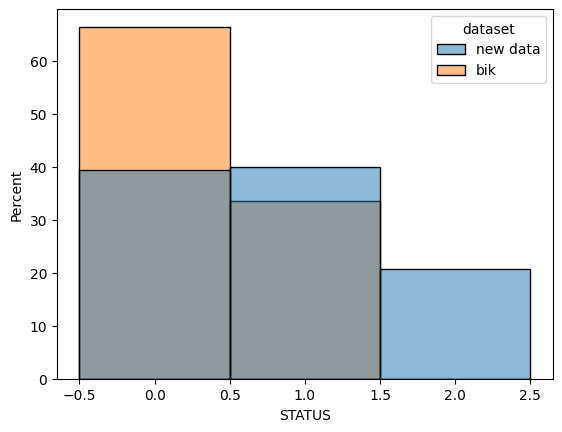

In [25]:

sns.histplot(
    full,
    x="STATUS",
    hue="dataset",
    stat="percent",
    discrete=True,
    common_norm=False,
)

[Text(0.5, 1.0, 'Proportion of default statuses in previous datasets')]

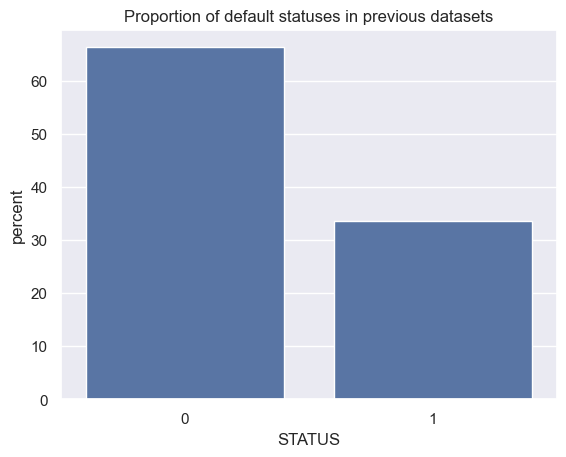

In [58]:
sns.set_theme()
ax = sns.countplot(
    full[full["dataset"] == "bik"],
    x="STATUS",
    stat="percent",
)

ax.set(title="Proportion of default statuses in previous datasets")

[Text(0.5, 1.0, 'Proportion of default statuses in new dataset')]

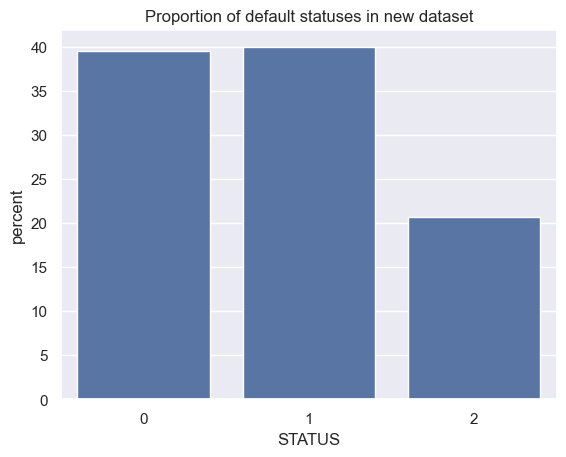

In [57]:
sns.set_theme()
ax = sns.countplot(
    full[full["dataset"] == "new data"],
    x="STATUS",
    stat="percent",
)

ax.set(title="Proportion of default statuses in new dataset")

In [59]:
full.groupby("dataset", as_index=False).value_counts(["STATUS"])

,dataset,STATUS,count
0,bik,0,9929
1,bik,1,5027
2,new data,1,9753
3,new data,0,9637
4,new data,2,5041


In [94]:
#full.to_csv(
#    r"C:\Users\julian\Desktop\studia\economic analytics\Projekt Badawczy - BIK\01_dane\02_dane_finalne\full_data.csv",
#)

In [ ]:
#f = lambda x: ((x.replace(",", ".")))
#new_full = pd.read_csv(
#    r"C:\Users\julian\Desktop\studia\economic analytics\Projekt Badawczy - BIK\01_dane\02_dane_finalne\full_data.csv",
#    converters={
#        "ILE_BANKOW": f,
#        "ILE_BANKOW_12": f,
#        "ILE_MIES_OD_NAJSTAR_OTW": f,
#        "ILE_MIES_OD_NAJSTAR_OTW_NRAT": f,
#        "ILE_MIES_OD_NAJSTAR_OTW_RAT": f,
#        "ILE_PRODUKTOW": f,
#        "ILE_RACH_OTW": f,
#        "ILE_RACH_OTW_12": f,
#        "ILE_RACH_OTW_NRAT": f,
#        "ILE_RACH_OTW_NRAT_12": f,
#        "ILE_RACH_OTW_RAT": f,
#        "ILE_RACH_OTW_RAT_12": f,
#        "ILE_RACH_OTW_BEZ_HIPO": f,
#        "ILE_RACH_OTW_KARTY": f,
#        "ILE_RACH_OTW_ODNAWIALNE": f,
#        "ILE_RACH_ZAMK": f,
#        "ILE_ZAPYTAN_12": f,
#        "ILE_ZAPYTAN_3": f,
#        "ILE_ZAPYTAN_6": f,
#        "ILE_ZAPYTAN_9": f,
#        "L_RACHUNKOW": f,
#        "MAX_NAL_WYMAGAL": f,
#        "MAX_RATA": f,
#        "MAX_WNIOSKODAWCY": f,
#        "MIN_L_RAT_DO_SPLATY": f,
#        "SUMA_DO_SPLATY": f,
#        "SUMA_DO_SPLATY_BEZ_HIPO": f,
#        "SUMA_DO_SPLATY_KARTY": f,
#        "SUMA_DO_SPLATY_NRAT": f,
#        "SUMA_DO_SPLATY_ODNAWIALNE": f,
#        "SUMA_DO_SPLATY_RAT": f,
#        "SUMA_LIMIT": f,
#        "SUMA_LIMIT_KARTY": f,
#        "SUMA_LIMIT_ODNAWIALNE": f,
#        "SUMA_NAL_WYMAGAL": f,
#        "SUMA_NAL_WYMAGAL_BEZ_HIPO": f,
#        "SUMA_NAL_WYMAGAL_KARTY": f,
#        "SUMA_NAL_WYMAGAL_NRAT": f,
#        "SUMA_RATA": f,
#    },
#)
#new_full.to_csv()

C:\Users\julian\AppData\Local\Temp\ipykernel_18416\1942251136.py:2: DtypeWarning: Columns (43,44,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  new_full = pd.read_csv(


In [238]:
new_full = pd.read_csv(
    r"C:\Users\julian\Desktop\studia\economic analytics\Projekt Badawczy - BIK\01_dane\02_dane_finalne\full_data.csv"
)
new_full.loc[new_full["dataset"] == "new data", "dataset name"] = "2016 dataset"
new_full.loc[new_full["dataset"] == "bik", "dataset name"] = "2010 dataset"

C:\Users\julian\AppData\Local\Temp\ipykernel_18416\3203972164.py:1: DtypeWarning: Columns (43,44,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  new_full = pd.read_csv(


In [239]:
column_list = [
    "ILE_ZAPYTAN_12",
    "SUMA_DO_SPLATY_BEZ_HIPO",
    "SUMA_LIMIT",
    "SUMA_NAL_WYMAGAL_BEZ_HIPO",
    "SUMA_RATA",
    "STATUS",
    "dataset name",
]

In [240]:
limited_columns = new_full[column_list]

In [140]:
#limited_columns["STATUS"] = limited_columns["STATUS"].astype(str)

C:\Users\julian\AppData\Local\Temp\ipykernel_18416\4052161946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_columns["STATUS"] = limited_columns["STATUS"].astype(str)


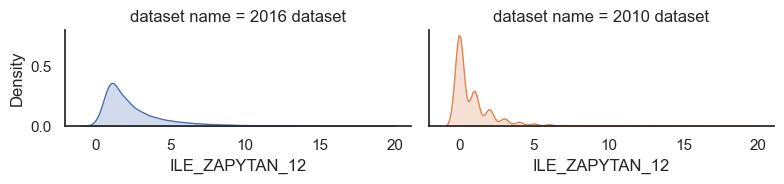

In [241]:
g = sns.FacetGrid(
    limited_columns,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(sns.kdeplot, "ILE_ZAPYTAN_12", fill=True, clip=(-1, 20))

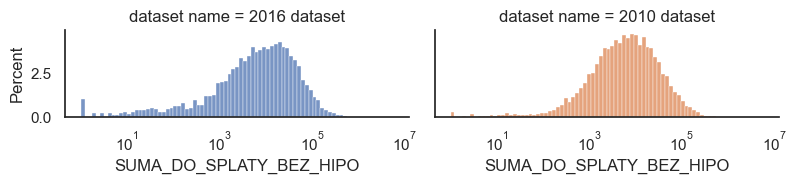

In [242]:
g = sns.FacetGrid(
    limited_columns,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(
    sns.histplot,
    "SUMA_DO_SPLATY_BEZ_HIPO",
    fill=True,
    log_scale=True,
    stat="percent",
)

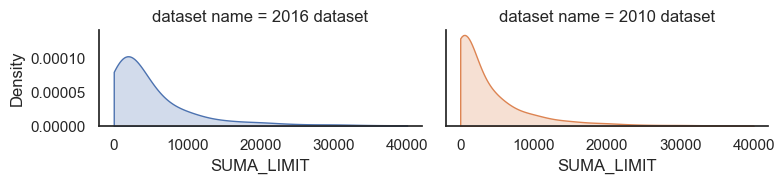

In [243]:
g = sns.FacetGrid(
    limited_columns,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(sns.kdeplot, "SUMA_LIMIT", fill=True, clip=(-1, 40000))

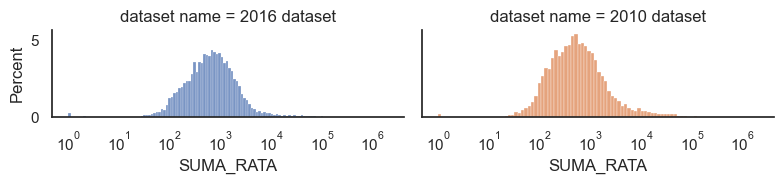

In [244]:
g = sns.FacetGrid(
    limited_columns,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(
    sns.histplot,
    "SUMA_RATA",
    fill=True,
    log_scale=True,
    stat="percent",
)

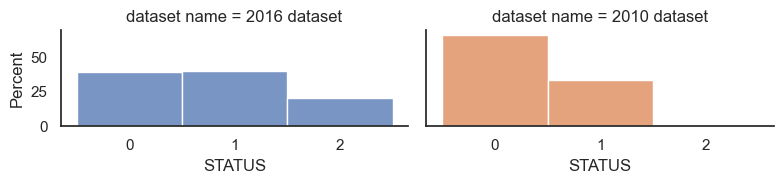

In [255]:
g = sns.FacetGrid(
    limited_columns,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(sns.histplot, "STATUS", fill=True, stat="percent", discrete=True, binrange=(0, 2))
g.set(xticks=[0, 1, 2])

c:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


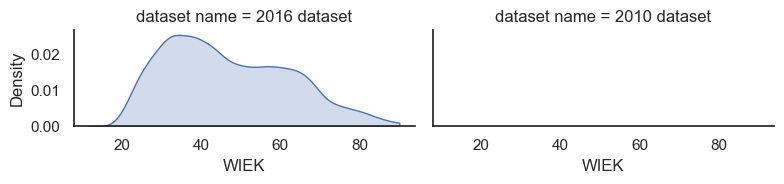

In [251]:
g = sns.FacetGrid(
    new_full,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(sns.kdeplot, "WIEK", fill=True, clip=(0, 90))

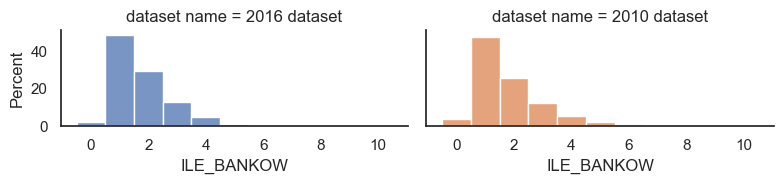

In [252]:
g = sns.FacetGrid(
    new_full,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(
    sns.histplot,
    "ILE_BANKOW",
    fill=True,
    stat="percent",
    discrete=True,
    binrange=(0, 10),
)

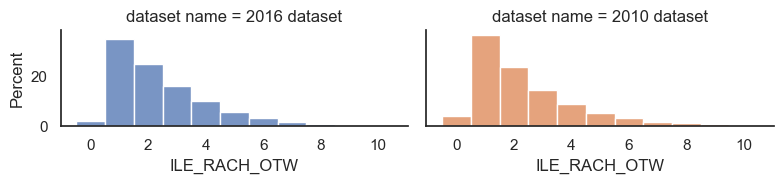

In [254]:
g = sns.FacetGrid(
    new_full,
    col="dataset name",
    height=2,
    hue="dataset name",
    aspect=2,
)
g.map(
    sns.histplot,
    "ILE_RACH_OTW",
    fill=True,
    stat="percent",
    discrete=True,
    binrange=(0, 10),
)

In [253]:
new_full



,Unnamed: 0,ID,ILE_BANKOW,ILE_BANKOW_12,ILE_MIES_OD_NAJSTAR_OTW,ILE_MIES_OD_NAJSTAR_OTW_NRAT,ILE_MIES_OD_NAJSTAR_OTW_RAT,ILE_PRODUKTOW,ILE_RACH_OTW,ILE_RACH_OTW_12,...,SUMA_RATA,STATUS,TERYT,WOJEWODZTWO,POWIAT,GMINA,WIEK,PLEC,dataset,dataset name
0,0,10474.0,1,1.0,3.23,3.23,NaN,1,1,1,...,0.0,1,142707.0,MAZOWIECKIE,SIERPECKI,ZAWIDZ,19.0,M,new data,2016 dataset
1,1,12863.0,1,1.0,80.42,80.42,18.19,2,2,0,...,264.0,1,142905.0,MAZOWIECKIE,SOKOŁOWSKI,KOSÓW LACKI,27.0,M,new data,2016 dataset
2,2,24208.0,3,NaN,34.39,NaN,34.39,1,3,0,...,99.0,2,280703.0,WARMIŃSKO-MAZURSKIE,IŁAWSKI,IŁAWA,25.0,M,new data,2016 dataset
3,3,21202.0,1,NaN,39.23,39.23,35.52,2,2,0,...,0.0,2,81202.0,LUBUSKIE,WSCHOWSKI,SZLICHTYNGOWA,27.0,M,new data,2016 dataset
4,4,10179.0,1,1.0,2.06,NaN,2.06,1,1,1,...,649.0,1,101604.0,ŁÓDZKIE,TOMASZOWSKI,CZERNIEWICE,36.0,K,new data,2016 dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39382,39382,NaN,2,0.0,49.00,0.00,49.00,2,2,0,...,3502.0,1,NaN,NaN,NaN,NaN,NaN,NaN,bik,2010 dataset
39383,39383,NaN,2,0.0,117.00,0.00,117.00,2,2,0,...,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,bik,2010 dataset
39384,39384,NaN,3,0.0,18.00,0.00,18.00,2,3,0,...,39582.0,1,NaN,NaN,NaN,NaN,NaN,NaN,bik,2010 dataset
39385,39385,NaN,3,0.0,68.00,0.00,68.00,2,4,0,...,3517.0,1,NaN,NaN,NaN,NaN,NaN,NaN,bik,2010 dataset


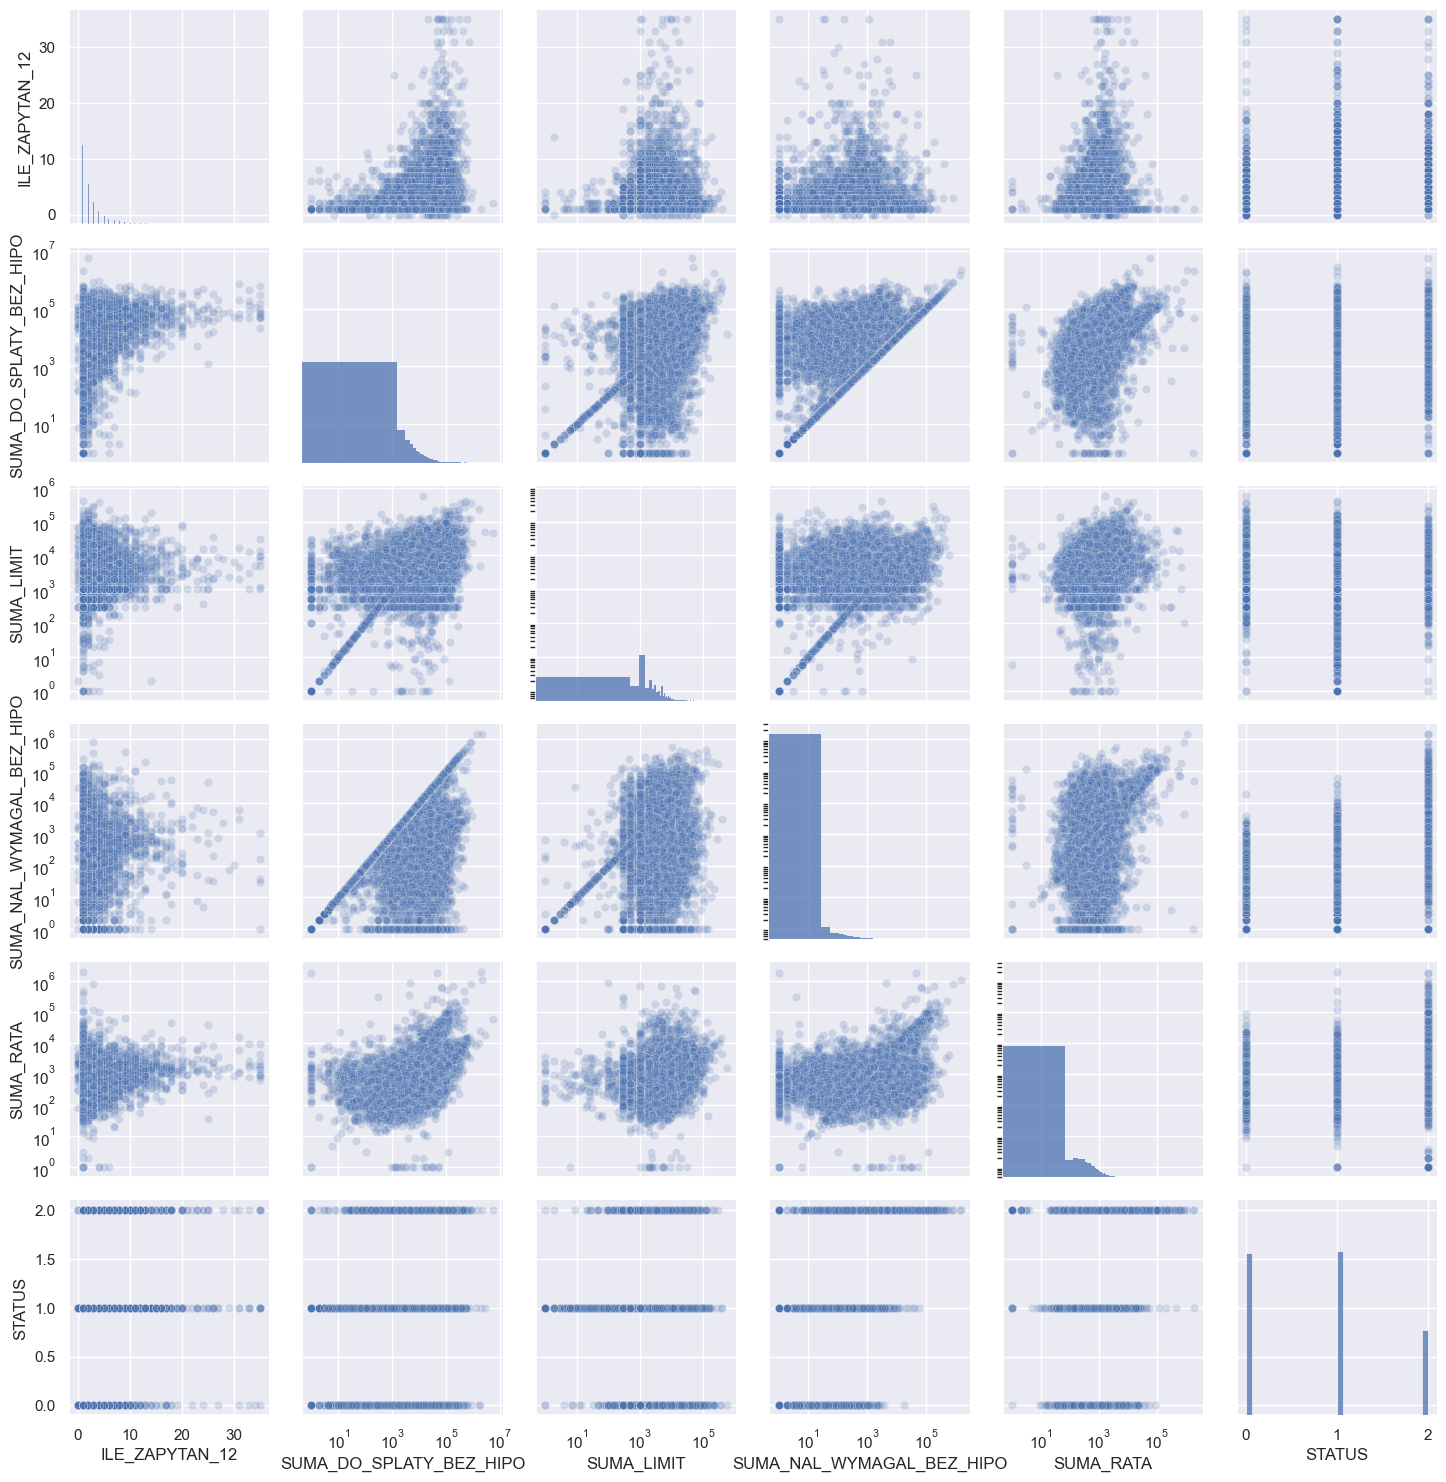

In [156]:
pp = sns.pairplot(
    limited_columns[limited_columns["dataset"] == "new data"],
    # hue="STATUS",
    plot_kws={"alpha": 0.2},
)

log_columns = [
    "SUMA_DO_SPLATY_BEZ_HIPO",
    "SUMA_LIMIT",
    "SUMA_NAL_WYMAGAL_BEZ_HIPO",
    "SUMA_RATA",
]

for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")
    if ax.get_ylabel() in log_columns:
        ax.set(yscale="log")

In [1]:
import pandas as pd

In [2]:
pd.read_csv(r"C:\Users\julian\Downloads\FRB_CHGDEL.csv")

,Series Description,Delinquency rate on all loans; All commercial banks (Seasonally adjusted),Delinquency rate on loans to finance agricultural production; All commercial banks (Seasonally adjusted),Delinquency rate on business loans; All commercial banks (Seasonally adjusted),Delinquency rate on loans secured by real estate; All commercial banks (Seasonally adjusted),Delinquency rate on consumer loans; All commercial banks (Seasonally adjusted),"Delinquency rate on single-family residential mortgages, booked in domestic offices; All commercial banks (Seasonally adjusted)",Delinquency rate on lease financing receivables; All commercial banks (Seasonally adjusted),Delinquency rate on credit card loans; All commercial banks (Seasonally adjusted),Delinquency rate on other consumer loans; All commercial banks (Seasonally adjusted),...,Delinquency rate on loans to finance agricultural production; All commercial banks,Delinquency rate on business loans; All commercial banks,Delinquency rate on loans secured by real estate; All commercial banks,Delinquency rate on consumer loans; All commercial banks,"Delinquency rate on single-family residential mortgages, booked in domestic offices; All commercial banks",Delinquency rate on lease financing receivables; All commercial banks,Delinquency rate on credit card loans; All commercial banks,Delinquency rate on other consumer loans; All commercial banks,"Delinquency rate on commercial real estate loans (excluding farmland), booked in domestic offices; All commercial banks","Delinquency rate on farmland loans, booked in domestic offices; All commercial banks"
0,Unit:,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,...,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage,Percentage
1,Multiplier:,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Currency:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unique Identifier:,CHGDEL/CHGDEL/STFBQD%STFBAIL_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDF%STFBAILF_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDB%STFBAILB_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDS%STFBAILS_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDC%STFBAILC_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDSS%STFBAILSS_XEOP_XDO_MA.Q,CHGDEL/CHGDEL/STFBQDR%STFBAILR_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDCC%STFBAILCC_XEOP_MA.Q,CHGDEL/CHGDEL/STFBQDCO%STFBAILCO_XEOP_MA.Q,...,CHGDEL/CHGDEL/STFBQDF%STFBAILF_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDB%STFBAILB_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDS%STFBAILS_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDC%STFBAILC_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDSS%STFBAILSS_XEOP_XDO_MA_N.Q,CHGDEL/CHGDEL/STFBQDR%STFBAILR_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDCC%STFBAILCC_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDCO%STFBAILCO_XEOP_MA_N.Q,CHGDEL/CHGDEL/STFBQDSX%STFBAILSX_XEOP_XDO_MA_N.Q,CHGDEL/CHGDEL/STFBQDSF%STFBAILSF_XEOP_XDO_MA_N.Q
4,Time Period,STFBQD%STFBAIL_XEOP_MA.Q,STFBQDF%STFBAILF_XEOP_MA.Q,STFBQDB%STFBAILB_XEOP_MA.Q,STFBQDS%STFBAILS_XEOP_MA.Q,STFBQDC%STFBAILC_XEOP_MA.Q,STFBQDSS%STFBAILSS_XEOP_XDO_MA.Q,STFBQDR%STFBAILR_XEOP_MA.Q,STFBQDCC%STFBAILCC_XEOP_MA.Q,STFBQDCO%STFBAILCO_XEOP_MA.Q,...,STFBQDF%STFBAILF_XEOP_MA_N.Q,STFBQDB%STFBAILB_XEOP_MA_N.Q,STFBQDS%STFBAILS_XEOP_MA_N.Q,STFBQDC%STFBAILC_XEOP_MA_N.Q,STFBQDSS%STFBAILSS_XEOP_XDO_MA_N.Q,STFBQDR%STFBAILR_XEOP_MA_N.Q,STFBQDCC%STFBAILCC_XEOP_MA_N.Q,STFBQDCO%STFBAILCO_XEOP_MA_N.Q,STFBQDSX%STFBAILSX_XEOP_XDO_MA_N.Q,STFBQDSF%STFBAILSF_XEOP_XDO_MA_N.Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024Q1,1.43,1.02,1.12,1.45,2.67,1.71,1.08,3.17,2.14,...,1.25,1.13,1.47,2.64,1.73,1.13,3.23,2.04,1.25,1.13
162,2024Q2,1.48,0.96,1.13,1.56,2.72,1.73,1.16,3.24,2.20,...,0.93,1.13,1.53,2.59,1.68,1.09,3.04,2.13,1.40,1.07
163,2024Q3,1.51,1.25,1.18,1.60,2.73,1.74,1.09,3.20,2.19,...,1.16,1.16,1.58,2.72,1.70,1.06,3.23,2.18,1.49,1.06
164,2024Q4,1.54,1.19,1.28,1.64,2.76,1.77,1.13,3.08,2.42,...,1.03,1.30,1.67,2.93,1.82,1.18,3.18,2.61,1.55,1.10
